# Homeowork 3
Computational Physics Fall 2025

# Problem 1: Round-Off Errors

## Part A
I mean we just plug in the formula

In [10]:
from math import sqrt

def quad(a,b,c):
    return [(-b + sqrt(b**2 - 4*a*c))/(2*a),(-b - sqrt(b**2 - 4*a*c))/(2*a)]

# Do the calcualtion the exercise wanted
print("The two solutions are:", quad(0.001,1000,0.001))

The two solutions are: [-9.999894245993346e-07, -999999.999999]


## Part B

To prove this notice the following expansion
$$
a(x-x_+)(x-x_-) = ax^2 - a(x_+ + x_-) + ax_+x_-,
$$
so the product of the two solutions is $c/a$. Using this fact we can do
$$
\begin{align*}
x_{\pm} &= x_{\pm} \frac{x_{\mp}}{x_{\mp}}\\
&= \frac{c}{ax_{\mp}}\\
&= \frac{2c}{-b \mp \sqrt{b^2 - 4ac}}
\end{align*} 
$$
Here is a function that does this

In [8]:
def quad_inv(a,b,c):
    return [(2*c)/(-b - sqrt(b**2 - 4*a*c)),(2*c)/(-b + sqrt(b**2 - 4*a*c))]

# Do the calcualtion the exercise wanted
print("The two solutions are:", quad_inv(0.001,1000,0.001))

The two solutions are: [-1.000000000001e-06, -1000010.5755125057]


What we see is a precision issue! I love this sm! One solution is underflowing and the other is overflowing. Let's see which one is truer than the other hehe

In [14]:
# Spits out a function that evaluates our quadratic
def quadratic(a,b,c):
    return lambda x: a*x**2 + b*x + c

# Let's check
a,b,c = 0.001,1000,0.001
equation = quadratic(a,b,c)

print([[equation(x),equation(y)] for (x,y) in zip(quad(a,b,c),quad_inv(a,b,c))])

[[1.0575401665491313e-08, 0.0], [7.247924804689582e-08, 10575.62534720993]]


As we can see, for the first solution, the output of the second equation is closer to the true answer, while for the second it is the output of the frist equation that works. I love that.

Here is a program that solves this ambiguity

In [21]:
def quad_closest(a,b,c):
    equation    = lambda x: abs(quadratic(a,b,c)(x))        # Stores the function that evaluates the equation
    solutions   = list(zip(quad(a,b,c),quad_inv(a,b,c)))    # Store the solutions
    
    # Compare the two solutions and return the one that minimizes the equation the most
    return [min(solns,key=equation) for solns in solutions]

# Print the output
quad_closest(0.001,1000,0.001)

[-1.000000000001e-06, -999999.999999]

# Problem 2: Derivative Precision

What we are implementing is called the Euler scheme for calculating the derivative. Here is a quick version

In [ ]:
# Calculates the derivative using Euler's scheme
def derivative(f, x:float, h:float):
    return (f(x + h) - f(x))/h

# Let's define a function
f       = lambda x: x*(x-1)
fprime  = lambda x: 2*x-1

# Here are the derivative calculations
print("True derivative      :",fprime(1))
print("Calculated Derivative:",derivative(f,1,1e-2))

True derivative      : 1
Calculated Derivative: 1.010000000000001


(np.float64(1e-14), np.float64(0.0001))

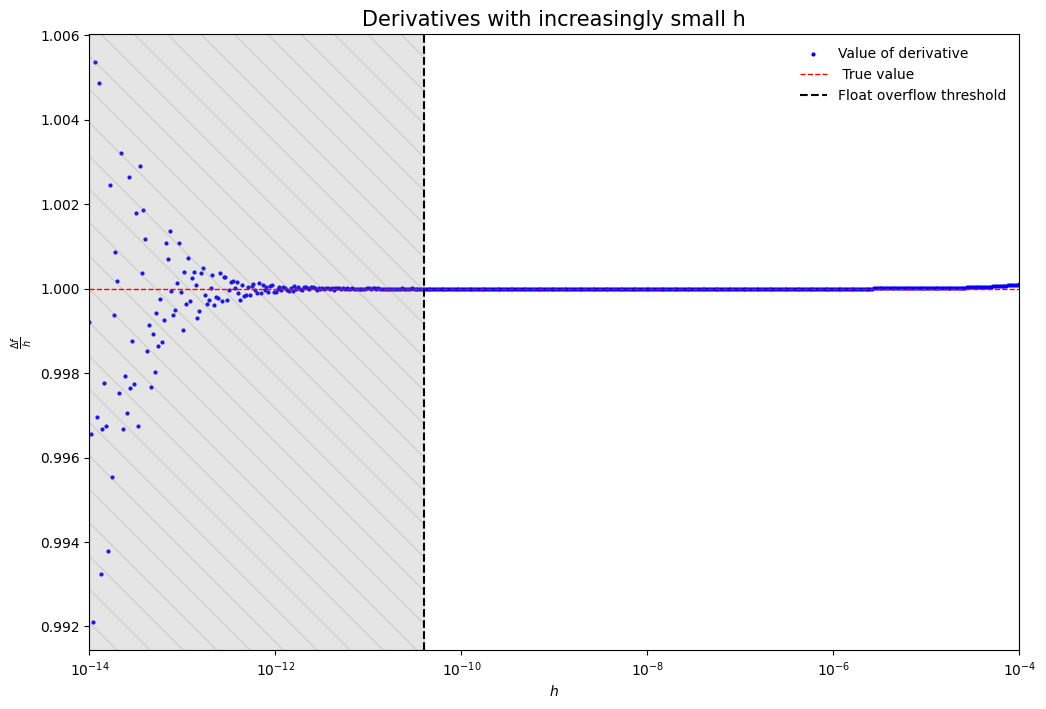

In [55]:
# Let's do a plot of them
import matplotlib.pyplot as plt

# define the range of h's
H = 10**np.linspace(-4,-14,500)

# The derivatives
derivatives = [derivative(f,1,h) for h in H]

# PLOTTING ---------------------------------------------------
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

threshold = 4e-11

# Add the plot elements
ax.scatter(H, derivatives, c='blue', s= 4, label="Value of derivative")
ax.axhline(fprime(1),c = 'red', ls='--', lw=1, label=" True value")
ax.axvline(threshold, c = 'k', ls = '--', label="Float overflow threshold")
ax.axvspan(H[-1],threshold, color = 'gray', alpha = 0.2, hatch="\\")

# Some prettification steps
ax.set_title("Derivatives with increasingly small h",fontsize=15)
ax.legend(frameon=False)
ax.set_ylabel(r'$\frac{\Delta f}{h}$')
ax.set_xlabel(r'$h$')
ax.set_xscale('log')
ax.set_xlim(H[-1],H[0])

# Problem 3: Exponential Approximation

Now we get to experience a slowly converging sum hehe. 

## Part A

We will just sum up to the point that the contribution is too small.

In [105]:
from math import factorial
from numpy import exp

# The truncated calculation
def exp_trunc(x:float, thresh:float=1e-7,N=-1):
    EXP = 1
    n   = 1
    while True:
        term    = (-1)**n * (x**n) /factorial(n)
        EXP    += term
        n      += 1
        if N == -1:
            if abs(term) <= thresh * abs(EXP):
                break
        elif n >= N:
            break
    
    return EXP

# Do some small calculations
x = 0.1
print(f"True: exp(-{x}) = {exp(-x)}\nCalc: exp(-{x}) = {exp_trunc(x)}")

True: exp(-0.1) = 0.9048374180359595
Calc: exp(-0.1) = 0.9048374166666667


# Part B

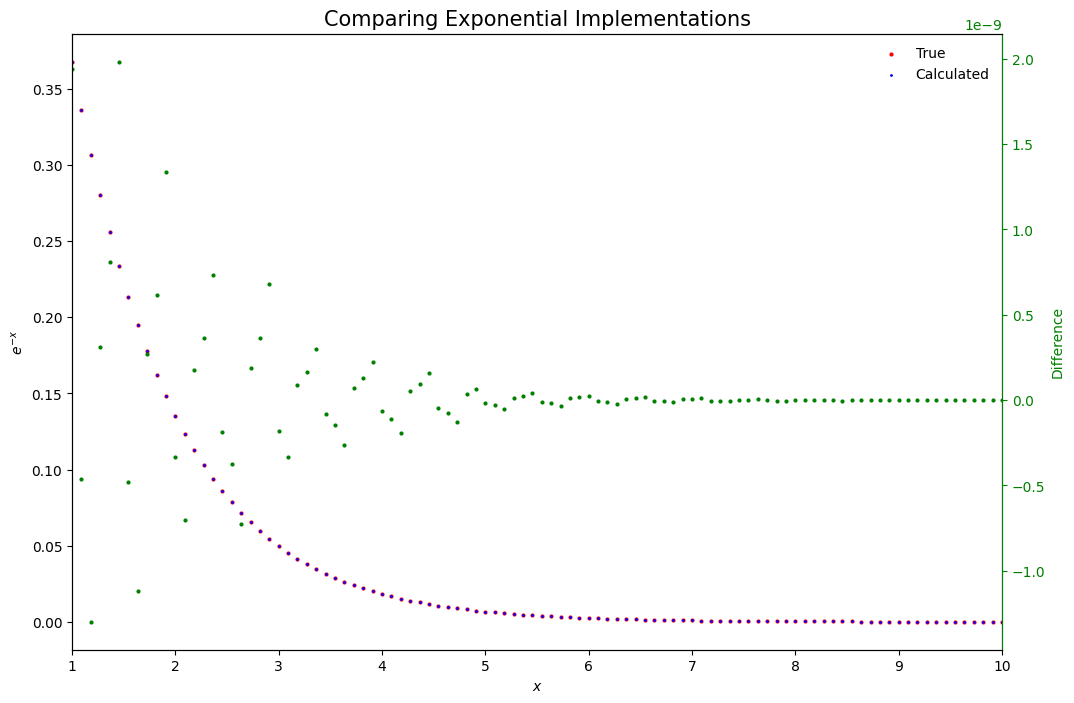

In [ ]:
# Compare the two results
from numpy import linspace

x       = linspace(1,10,100)         # Range to compare in
true    = exp(-x)                   # Calculate the true value
calc    = [exp_trunc(i) for i in x] # Estimation
diff    = true - calc               # Difference

# PLOTTING ---------------------------------------------------
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

# Add the plot elements
ax1.scatter(x, true, c='r', s=4, marker='o', label="True")
ax1.scatter(x, calc, c='b', s=4, marker='.', label="Calculated")
ax2.scatter(x, diff, c='g', s=4, marker='o', label="Difference")

# Some prettification steps
ax1.set_title(r"Comparing Exponential Implementations $x \in [1,10]$",fontsize=15)
ax1.legend(frameon=False)
ax1.set_ylabel(r'$e^{-x}$')
ax1.set_xlabel(r'$x$')
ax1.set_xlim(x[0],x[-1])
ax2.set_ylabel('Difference',color="g")
ax2.spines[["right"]].set_color("g")
ax2.tick_params(axis="y", labelcolor="g",color="g")

/tmp/ipykernel_2169/37455701.py:9: RuntimeWarning: overflow encountered in scalar power
  term    = (-1)**n * (x**n) /factorial(n)


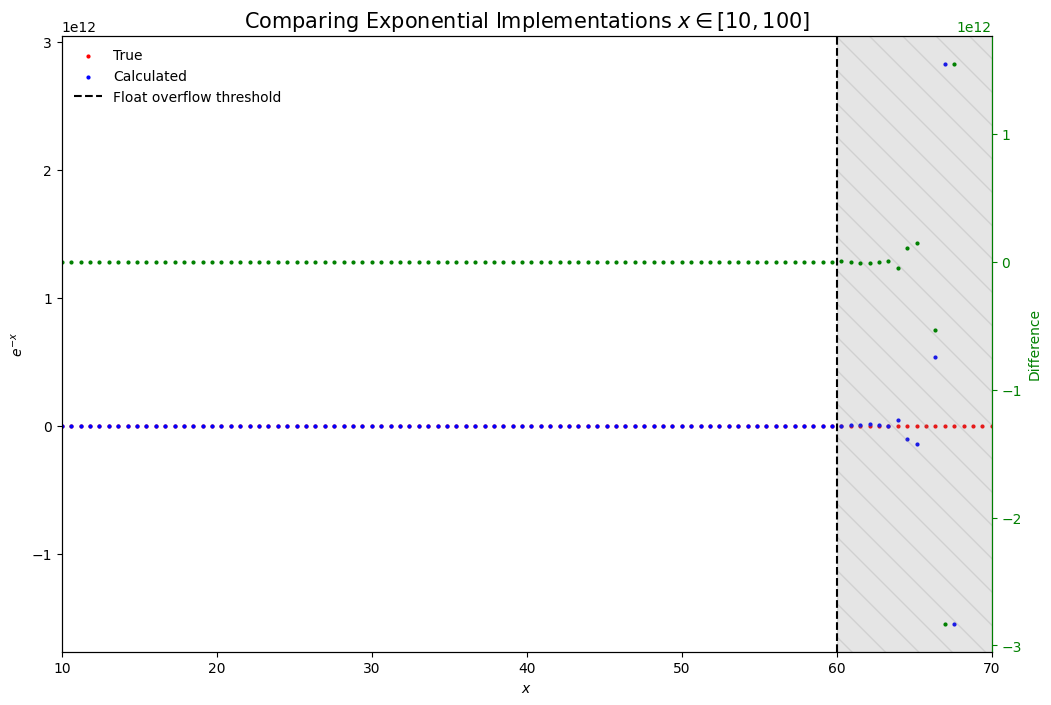

In [117]:
# Compare the two results
from numpy import linspace

x       = linspace(10,70,100)         # Range to compare in
true    = exp(-x)                   # Calculate the true value
calc    = [exp_trunc(i) for i in x] # Estimation
diff    = true - calc               # Difference

# PLOTTING ---------------------------------------------------
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

# Add the plot elements
threshold = 60
ax1.scatter(x, true, c='r', s=4, marker='o', label="True")
ax1.scatter(x, calc, c='b', s=4, marker='o', label="Calculated")
ax2.scatter(x, diff, c='g', s=4, marker='o', label="Difference")
ax1.axvline(threshold, c = 'k', ls = '--', label="Float overflow threshold")
ax1.axvspan(threshold, x[-1], color = 'gray', alpha = 0.2, hatch="\\")

# Some prettification steps
ax1.set_title(r"Comparing Exponential Implementations $x \in [10,100]$",fontsize=15)
ax1.legend(frameon=False)
ax1.set_ylabel(r'$e^{-x}$')
ax1.set_xlabel(r'$x$')
ax1.set_xlim(x[0],x[-1])
ax2.set_ylabel('Difference',color="g")
ax2.spines[["right"]].set_color("g")
ax2.tick_params(axis="y", labelcolor="g",color="g")

## Part D

Now to plot the error as a function of N

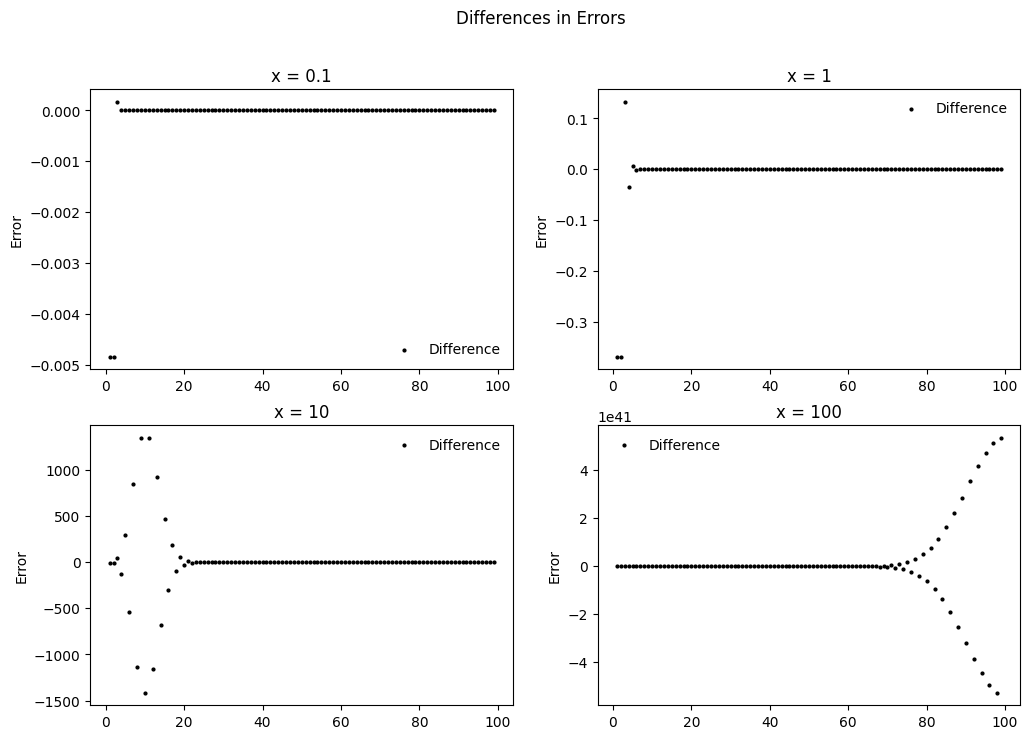

In [ ]:
# Let's make the plots as a function of N
N       = np.arange(1,100)                                      # The truncation numbers
X       = [0.1, 1, 10, 100]                                    # The datapoints to evaluate on
data    = [[exp_trunc(x,N=n) - exp(-x) for n in N] for x in X]  # The actual errors

# PLOTTING ---------------------------------------------------
fig, axes = plt.subplots(2,2,figsize=(12,8))
fig.suptitle("Differences in Errors")

# For each subplot draw it prettily
for ax,x,diff in zip(axes.flatten(),X,data):
    ax.scatter(N, diff, c='k', s=4, marker='o', label="Difference")

    # Some prettification steps
    ax.set_title(f"x = {x}")
    ax.legend(frameon=False)
    ax.set_ylabel("Error")
    ax1.set_xlabel("N")
    ax1.set_xlim(N[0],N[-1])

# Problem 4: Object-Oriented Programming

Ok! Let's do this! I will make a class about grading snacks. I have to munch on something while grading otherwise I get so tired so quickly and people's grades start dropping. So I will create a program that suggests a grading snack.

In [ ]:
from random import choice

class GradingSnack:
    
    # Constructor
    def __init_(self, snackType:str = 'chip', isAvailable:bool = True):
        self.snackType      = snackType
        self.isAvailable    = isAvailable
        self.isMunching     = False

    # Mutator methods
    def setSnackTupe(self, snackType:str):
        self.snackType = snackType

    def toggleAvailable(self):
        self.isAvailable = not self.isAvailable
    
    def toggleMunching(self):
        self.isMunching = not self.isMunching

    # A printing method
    def show(self):
        print(f"Snack: {self.snackType}\n\tAvailable? {self.isAvailable}\n\tMunching? {self.isMunching}")

# Now create a class that stores a list of snacks
class SnackDrawer:
    def __init__(self, snackList:list = []):
        self.snackList = snackList

    def addSnack(self, snack:GradingSnack):
        self.snackList.append(snack)
    
    def printSnacks(self):
        for snack in self.snackList:
            snack.show()
    
    def pickRandomSnack(self):
        available   = [snack for snack in self.snackList if snack.isAvailable and not snack.isMunching]
        chosen      = choice(available)

        chosen.isMunching   = True
        chosen.isAvailable  = False
